## Importing Required Libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

##  Loading the Dataset

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

## Reading the csv file using Pandas

In [4]:
df = pd.read_csv(url)

In [5]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
755,2014,MERCEDES-BENZ,G 63 AMG,SUV - STANDARD,5.5,8,AS7,Z,19.4,15.7,17.7,16,407
856,2014,NISSAN,ROGUE AWD,SUV - SMALL,2.5,4,AV,X,9.5,7.4,8.6,33,198
21,2014,AUDI,A4 QUATTRO,COMPACT,2.0,4,M6,Z,10.8,7.5,9.3,30,214
168,2014,CADILLAC,CTS SEDAN Vsport,MID-SIZE,3.6,6,AS8,Z,15.1,9.9,12.8,22,294
956,2014,SUBARU,LEGACY AWD,MID-SIZE,2.5,4,M6,X,11.3,8.2,9.9,29,228


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Creating a new data frame with less parameters

In [7]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.sample(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
298,5.7,8,13.1,301
316,2.4,4,8.8,202
96,3.0,6,9.9,228
138,3.0,6,11.0,253
66,2.0,4,10.3,237
767,4.7,8,12.1,278
707,2.0,4,7.0,161
254,1.8,4,7.9,182
883,3.8,6,11.9,274
812,1.6,4,9.0,207


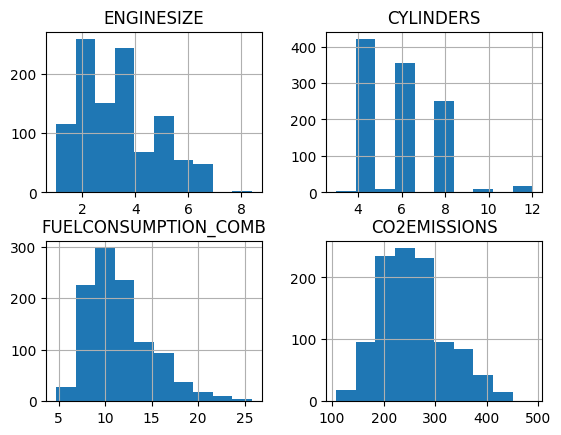

In [8]:
viz = cdf
viz.hist()
plt.show()

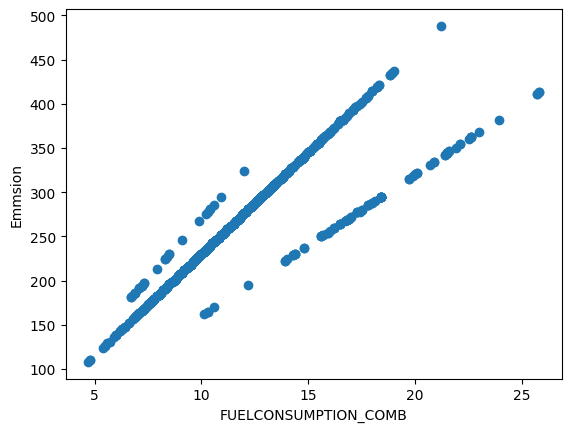

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emmsion")
plt.show()

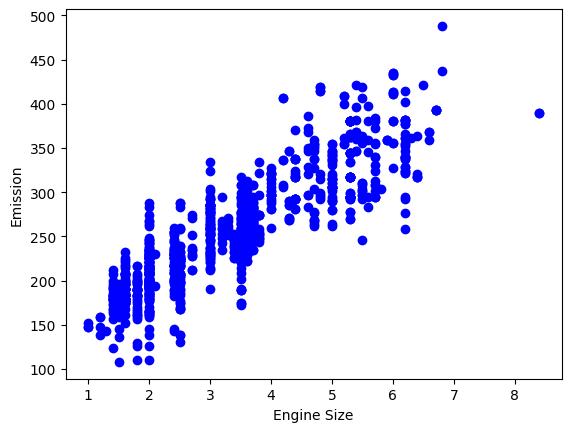

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

## Covert the Columns to an numpy Array.

In [11]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

## ##  Training the Linear Regression Model


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
type(X_train), np.shape(X_train)

(numpy.ndarray, (853,))

## Fitting the model

In [14]:
from sklearn import linear_model

#Creating a model object
regressor = linear_model.LinearRegression()

#Training th model on the traning data.
#Reshaping the X_train array to 2d array.
regressor.fit(X_train.reshape(-1,1), y_train)

print("Coefficient:", regressor.coef_[0])
print("Intercept:", regressor.intercept_)

Coefficient: 38.992978724434074
Intercept: 126.28970217408721


## Regression model is the line given by y = intercept + coefficient * x.

# Visualizing the Regression Line


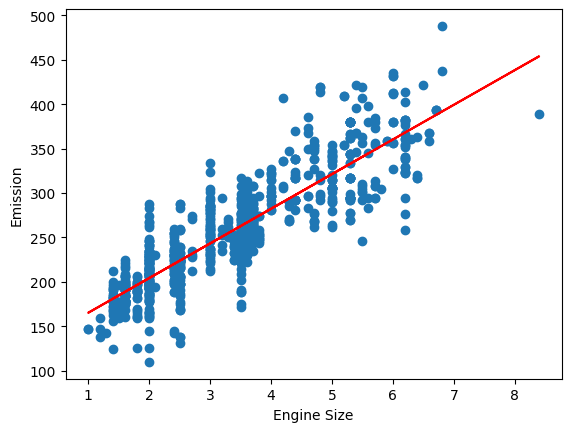

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.intercept_ + regressor.coef_ * X_train, "-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

##  Model Evaluation


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regressor.predict(X_test.reshape(-1,1))

print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R-2 Score: ",r2_score(y_test, y_pred))


Mean Absolute Error : 24.09725741170784
Mean Squared Error:  985.9381692274999
R-2 Score:  0.7615595731934373


Text(0, 0.5, 'Emission')

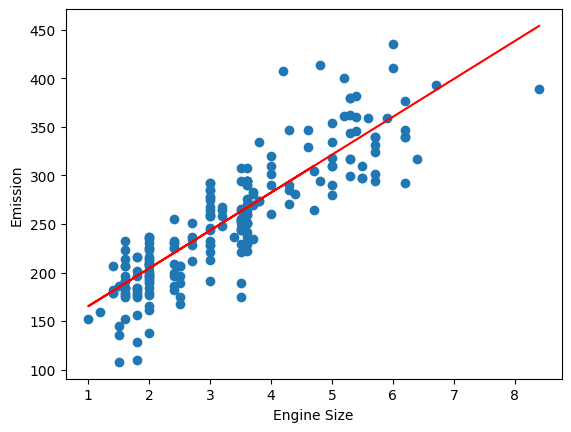

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.intercept_ + regressor.coef_ * X_test, "-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")

## ---------------------------------------------------------------------------------

## Now Training another model with fuel consumption and emission instead of engine size and emission.

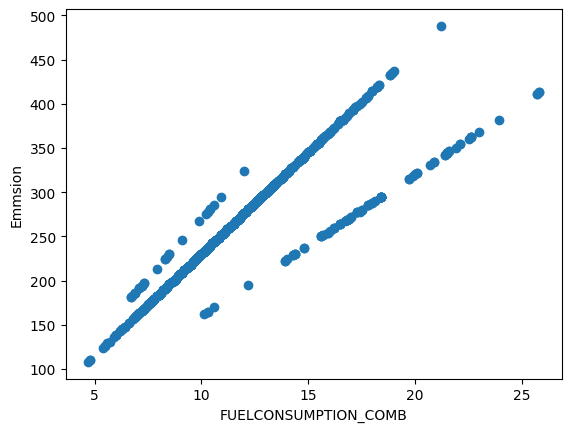

In [18]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emmsion")
plt.show()

## Training the Linear Regression Model


In [19]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [20]:
type(X_train), np.shape(X_train)
print(X_train[:5])

[ 7.8 12.7  9.9 11.4 16.5]


## Fitting the model

In [21]:
regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1,1), y_train)

print(X_train.reshape(-1,1)[:5])


[[ 7.8]
 [12.7]
 [ 9.9]
 [11.4]
 [16.5]]


##  Model Evaluation


In [22]:
y = regressor.predict(X_test.reshape(-1,1))

print("Mean Absolute Error :", mean_absolute_error(y_test, y))
print("Mean Squared Error: ", mean_squared_error(y_test, y))
print("R-2 Score: ",r2_score(y_test, y))

Mean Absolute Error : 20.441911472549585
Mean Squared Error:  797.4346310097205
R-2 Score:  0.8071474868274242


# Visualizing the Regression Line


Text(0, 0.5, 'Emission')

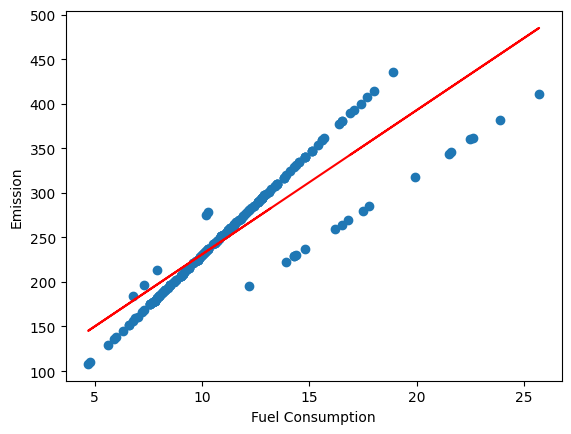

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.intercept_ + regressor.coef_ * X_test, "-r")
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")